In [1]:
import render as rend
import convert as conv

In [2]:
import sympy as sp
import sympy.physics.units as u


# System
![Alt text](03.jpg)

## Parameter

In [3]:
params = {"EI": 30000 * 10**3*u.N * u.m**2,
          "l_1":3.*u.m,
          "l_2":2.*u.m,
          "F_0":50.*10**3*u.N, 
          "M":1*10**3*u.N * u.seconds**2 / u.m, 
          "zeta":0.5/100,
          "omega":62.8/u.seconds,
          "g":10 *u.m / u.seconds**2,
          "h":200*u.mm,
          "f_ctm":2.9*u.N/u.mm**2}

In [4]:
params_pure = conv.param_value(params)

In [5]:
rend.param_render(params)

Eq(EI, 30000000*meter**2*newton)

Eq(l_1, 3.0*meter)

Eq(l_2, 2.0*meter)

Eq(F_0, 50000.0*newton)

Eq(M, 1000*newton*second**2/meter)

Eq(zeta, 0.005)

Eq(omega, 62.8/second)

Eq(g, 10*meter/second**2)

Eq(h, 200*millimeter)

Eq(f_ctm, 2.9*newton/millimeter**2)

In [6]:
EI, l1, l2, F0, M, zeta, t, omega, g= sp.symbols("EI, l_1, l_2, F_0, M, zeta t omega g")

In [7]:
F = sp.Function("F")(t)

In [8]:
F_t = F0 * sp.cos(omega * t)

rend.eq_render(locals())

Eq(F_t, F_0*cos(omega*t))

# Bestimmung der Verformung
Anhand C4 Bemessungstafeln Seite 166.

In [9]:
u_max = 1 / (EI) * ((l1 + l2)**2 - l1**2-l2**2) / (6*l2*l1) *l2*M*g * 1 * l2 * (l1+l2)

rend.eq_render(locals())

Eq(u_max, M*g*l_2*(l_1 + l_2)*(-l_1**2 - l_2**2 + (l_1 + l_2)**2)/(6*EI*l_1))

# Bestimmung der Steifigkeit des Systems

In [10]:
k = M*g / u_max

rend.eq_render(locals())

Eq(k, 6*EI*l_1/(l_2*(l_1 + l_2)*(-l_1**2 - l_2**2 + (l_1 + l_2)**2)))

# Bestimmung der Eigenkreisfrequenz

Eigenkreisfrequenz und Anregungsfrequenz liegen sehr stark bei einander! Die Dämpfungskonstante beeinflusst den Vergrösserungsfaktor massgebend!

In [11]:
omega_n = sp.sqrt(k / M)

rend.eq_render(locals())

Eq(omega_n, sqrt(6)*sqrt(EI*l_1/(M*l_2*(l_1 + l_2)*(-l_1**2 - l_2**2 + (l_1 + l_2)**2))))

# Vergrösserungsfaktor 

In [12]:
V_omega = 1 / (sp.sqrt((1-(omega/omega_n)**2)**2 + (2*zeta*(omega/omega_n))**2))
V_omega_ = conv.expr_value(V_omega, params)
rend.eq_render(locals())

Eq(V_omega, 1/sqrt((1 - M*l_2*omega**2*(l_1 + l_2)*(-l_1**2 - l_2**2 + (l_1 + l_2)**2)/(6*EI*l_1))**2 + 2*M*l_2*omega**2*zeta**2*(l_1 + l_2)*(-l_1**2 - l_2**2 + (l_1 + l_2)**2)/(3*EI*l_1)))

Eq(V_omega_, 8.07)

# Maximale statische Auslenkung

In [13]:
u_stat = F0 / k
u_stat_ = conv.expr_value(u_stat, params, u.mm)

rend.eq_render(locals())

Eq(u_stat, F_0*l_2*(l_1 + l_2)*(-l_1**2 - l_2**2 + (l_1 + l_2)**2)/(6*EI*l_1))

Eq(u_stat_, 11.1*millimeter)

# Dynamische Amplitude im stationären Fall 

In [14]:
u_dyn = u_stat * V_omega
u_dyn_ = conv.expr_value(u_dyn, params, u.mm)
rend.eq_render(locals())

Eq(u_dyn, F_0*l_2*(l_1 + l_2)*(-l_1**2 - l_2**2 + (l_1 + l_2)**2)/(6*EI*l_1*sqrt((1 - M*l_2*omega**2*(l_1 + l_2)*(-l_1**2 - l_2**2 + (l_1 + l_2)**2)/(6*EI*l_1))**2 + 2*M*l_2*omega**2*zeta**2*(l_1 + l_2)*(-l_1**2 - l_2**2 + (l_1 + l_2)**2)/(3*EI*l_1))))

Eq(u_dyn_, 89.6*millimeter)

# Stationäre Antwort 

Durch die harmonische Anregung wird sich das System in diesen Verlauf "einpendeln". Es gilt jedoch zu überprüfen ob anfängliche Überlagerungen mit der transienten Antwort nicht die Fliessspannung überschreiten. Ohnehin zeigt die stationäre Lösung, dass die Gebrauchstauglichkeit nicht erfüllt ist.

In [15]:
u_p_t = u_dyn * sp.cos(omega * t)
u_p_t_ = conv.expr_value(u_p_t, params_pure)

rend.eq_render(locals())

Eq(u_p_t, F_0*l_2*(l_1 + l_2)*(-l_1**2 - l_2**2 + (l_1 + l_2)**2)*cos(omega*t)/(6*EI*l_1*sqrt((1 - M*l_2*omega**2*(l_1 + l_2)*(-l_1**2 - l_2**2 + (l_1 + l_2)**2)/(6*EI*l_1))**2 + 2*M*l_2*omega**2*zeta**2*(l_1 + l_2)*(-l_1**2 - l_2**2 + (l_1 + l_2)**2)/(3*EI*l_1))))

Eq(u_p_t_, 0.0896*cos(62.8*t))

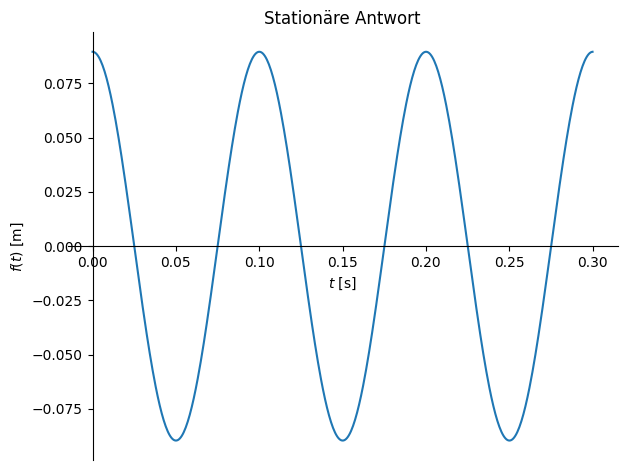

In [16]:
plot_stat = sp.plot(u_p_t_, (t, 0, 0.3), title='Stationäre Antwort', adaptive = False, nb_of_points = 500, xlabel='$t$ [s]', ylabel='$f(t)$ [m]')

In [17]:
import beton as b

In [18]:
t, k_t, f_ctd, m_cr = b.m_cr()




Berechnung des Rissmoments nach Skript **Karel Thoma Stahlbetonbau 2019**.

$t$ entspricht der Höhe des Zuggurts

Eq(t, h/3)

Eq(k_t, 1/(1 + h/(6*meter)))

Eq(f_ctd, f_ctm/(1 + h/(6*meter)))

Eq(m_cr, f_ctm*h**2/(6*(1 + h/(6*meter))))

In [19]:
t_ = conv.expr_value(t, params, u.mm)
k_t_ = conv.expr_value(k_t, params)
f_ctd_ = conv.expr_value(f_ctd, params, u.N/u.mm**2)
m_cr_ = conv.expr_value(m_cr, params, u.N)
rend.eq_render(globals())

Eq(t_, 66.7*millimeter)

Eq(k_t_, 0.968)

Eq(f_ctd_, 2.81*newton/millimeter**2)

Eq(m_cr_, 1.87e+4*newton)

In [20]:
import export as exp

In [21]:
exp.convert_notebook("test.ipynb", "docx")